In [ ]:
from google.colab import drive
import pandas as pd
from scipy import stats
from scipy.stats import shapiro, f_oneway, kruskal, mannwhitneyu ,ttest_ind, chi2_contingency ,kstest
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from statsmodels.stats.power import TTestIndPower
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay


# General

In [ ]:

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Marital status: The marital status of the student. (Categorical)

Application mode: The method of application used by the student. (Categorical)

Application order: The order in which the student applied. (Numerical)

Course: The course taken by the student. (Categorical)

**Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)**

Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)

Nacionality: The nationality of the student. (Categorical)

Mother's qualification: The qualification of the student's mother. (Categorical)

Father's qualification: The qualification of the student's father. (Categorical)

Mother's occupation: The occupation of the student's mother. (Categorical)

Father's occupation: The occupation of the student's father. (Categorical)

Displaced: Whether the student is a displaced person. (Categorical)

Educational special needs: Whether the student has any special educational needs. (Categorical)

Debtor: Whether the student is a debtor. (Categorical)

Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)

**Gender: The gender of the student. (Categorical)**

Scholarship holder: Whether the student is a scholarship holder. (Categorical)

**Age at enrollment: The age of the student at the time of enrollment. (Numerical)**

International: Whether the student is an international student. (Categorical)

**Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)**

**Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)**

**Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)**

**Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)**


In [ ]:
print(df.columns)
data = df.copy()
data = df[['Daytime/evening attendance','Gender','Age at enrollment','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
          'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)' ,'Curricular units 1st sem (without evaluations)','Course',
           'Target']]
data = df.copy()

data.head()


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
for item in data.columns:
  print(f'unique items for column {item}: {data[item].unique().shape}')

unique items for column Marital status: (6,)
unique items for column Application mode: (18,)
unique items for column Application order: (7,)
unique items for column Course: (17,)
unique items for column Daytime/evening attendance: (2,)
unique items for column Previous qualification: (17,)
unique items for column Nacionality: (19,)
unique items for column Mother's qualification: (29,)
unique items for column Father's qualification: (34,)
unique items for column Mother's occupation: (29,)
unique items for column Father's occupation: (42,)
unique items for column Displaced: (2,)
unique items for column Educational special needs: (2,)
unique items for column Debtor: (2,)
unique items for column Tuition fees up to date: (2,)
unique items for column Gender: (2,)
unique items for column Scholarship holder: (2,)
unique items for column Age at enrollment: (46,)
unique items for column International: (2,)
unique items for column Curricular units 1st sem (credited): (21,)
unique items for column 

Marital status


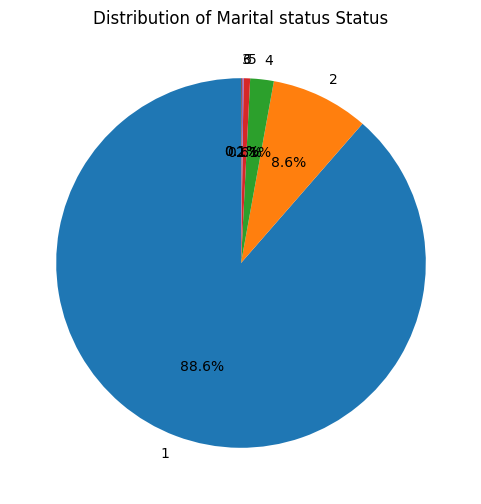

Application order


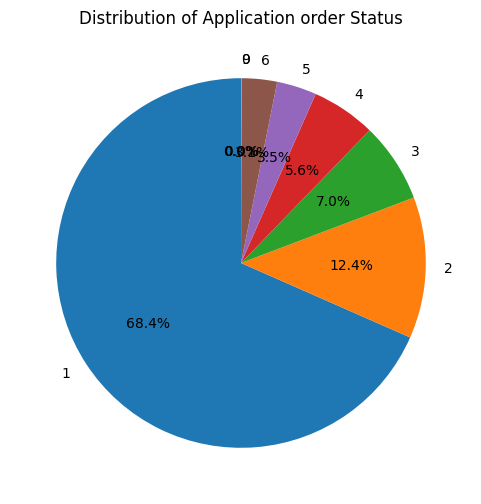

Daytime/evening attendance


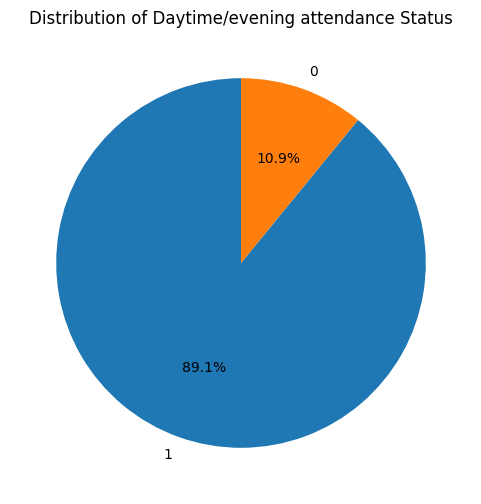

Displaced


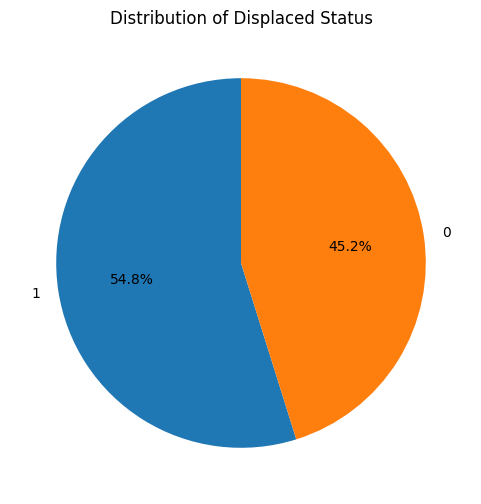

Educational special needs


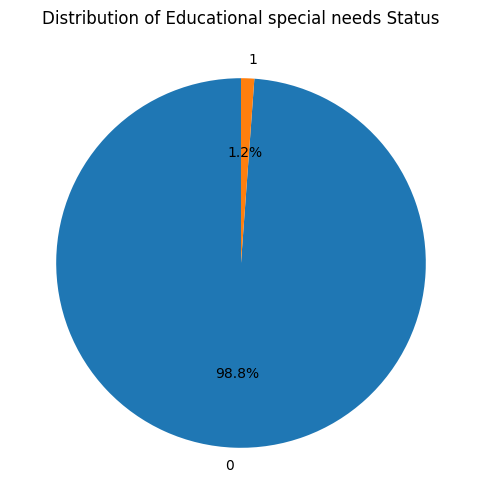

Debtor


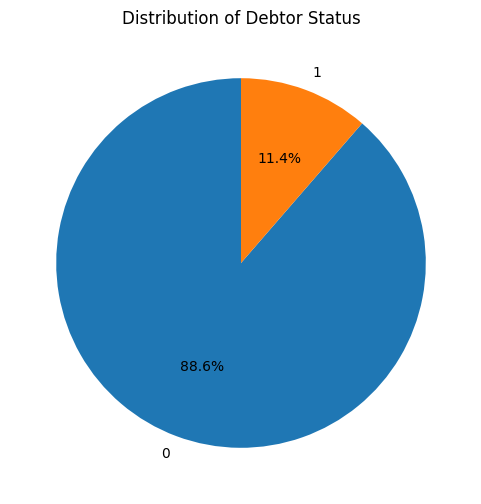

Tuition fees up to date


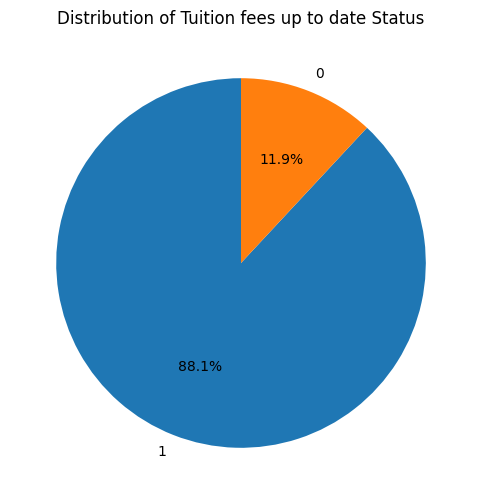

Gender


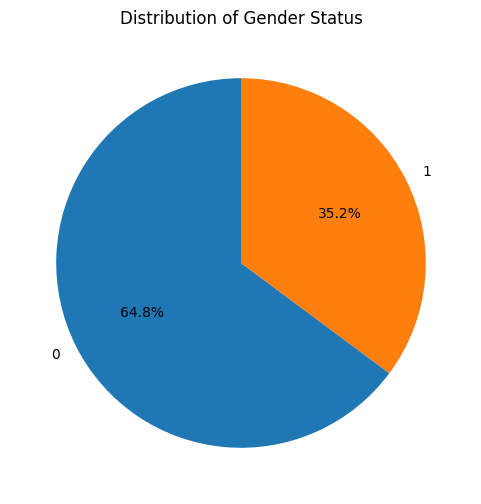

Scholarship holder


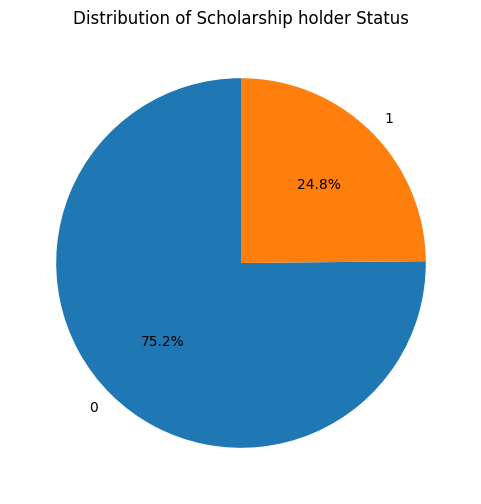

International


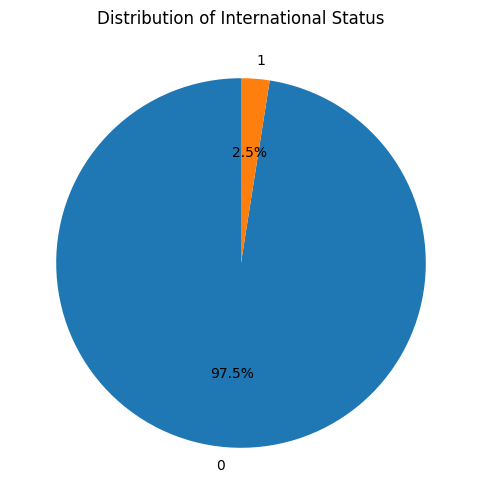

Curricular units 2nd sem (without evaluations)


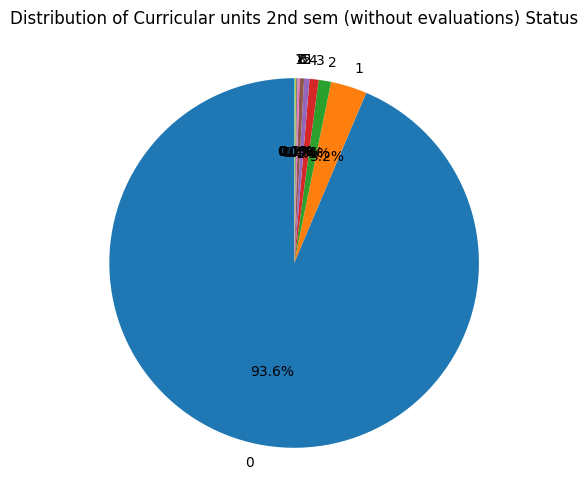

Unemployment rate


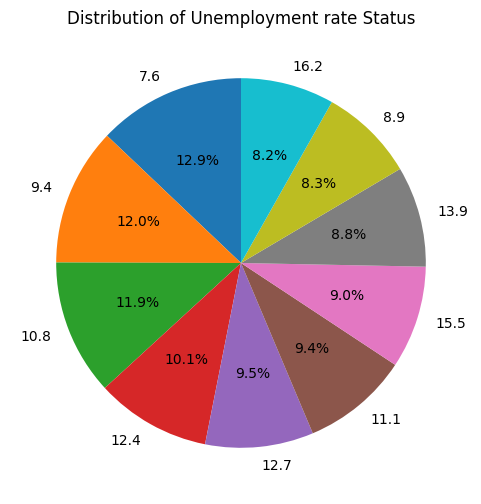

Inflation rate


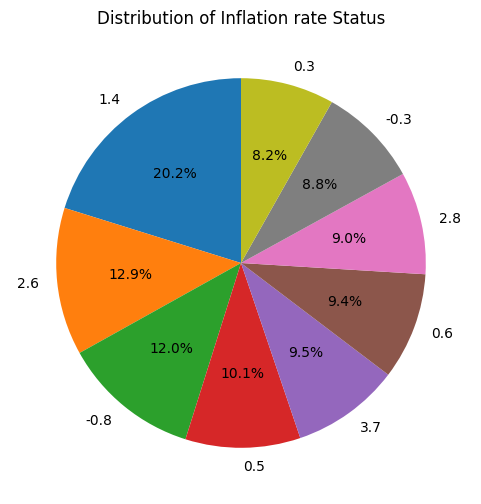

GDP


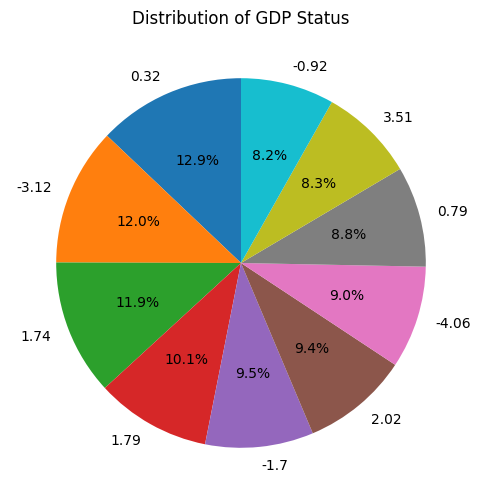

Target


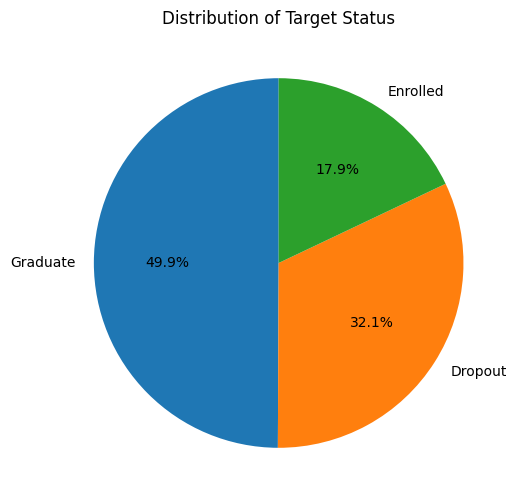

In [ ]:
for item in df.columns:
  if data[item].unique().shape[0]>10:
    continue
  print(item)
  # Example: Pie chart for 'Marital status'
  df[item].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))
  plt.ylabel('')  # Remove the y-label
  plt.title(f'Distribution of {item} Status')
  plt.show()

In [ ]:
#deleting all 'Enrolled' target columns and converting string to integers
data = data[data['Target']!='Enrolled']
data['Target'].unique()
data['Target'] = data['Target'].map({'Dropout':0,'Graduate':1})
data = data.astype('float64')
print(data.shape)
data.dtypes

(3630, 35)


<ipython-input-27-9bc9ebb01bb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Target'].map({'Dropout':0,'Graduate':1})


,0
Marital status,float64
Application mode,float64
Application order,float64
Course,float64
Daytime/evening attendance,float64
Previous qualification,float64
Nacionality,float64
Mother's qualification,float64
Father's qualification,float64
Mother's occupation,float64


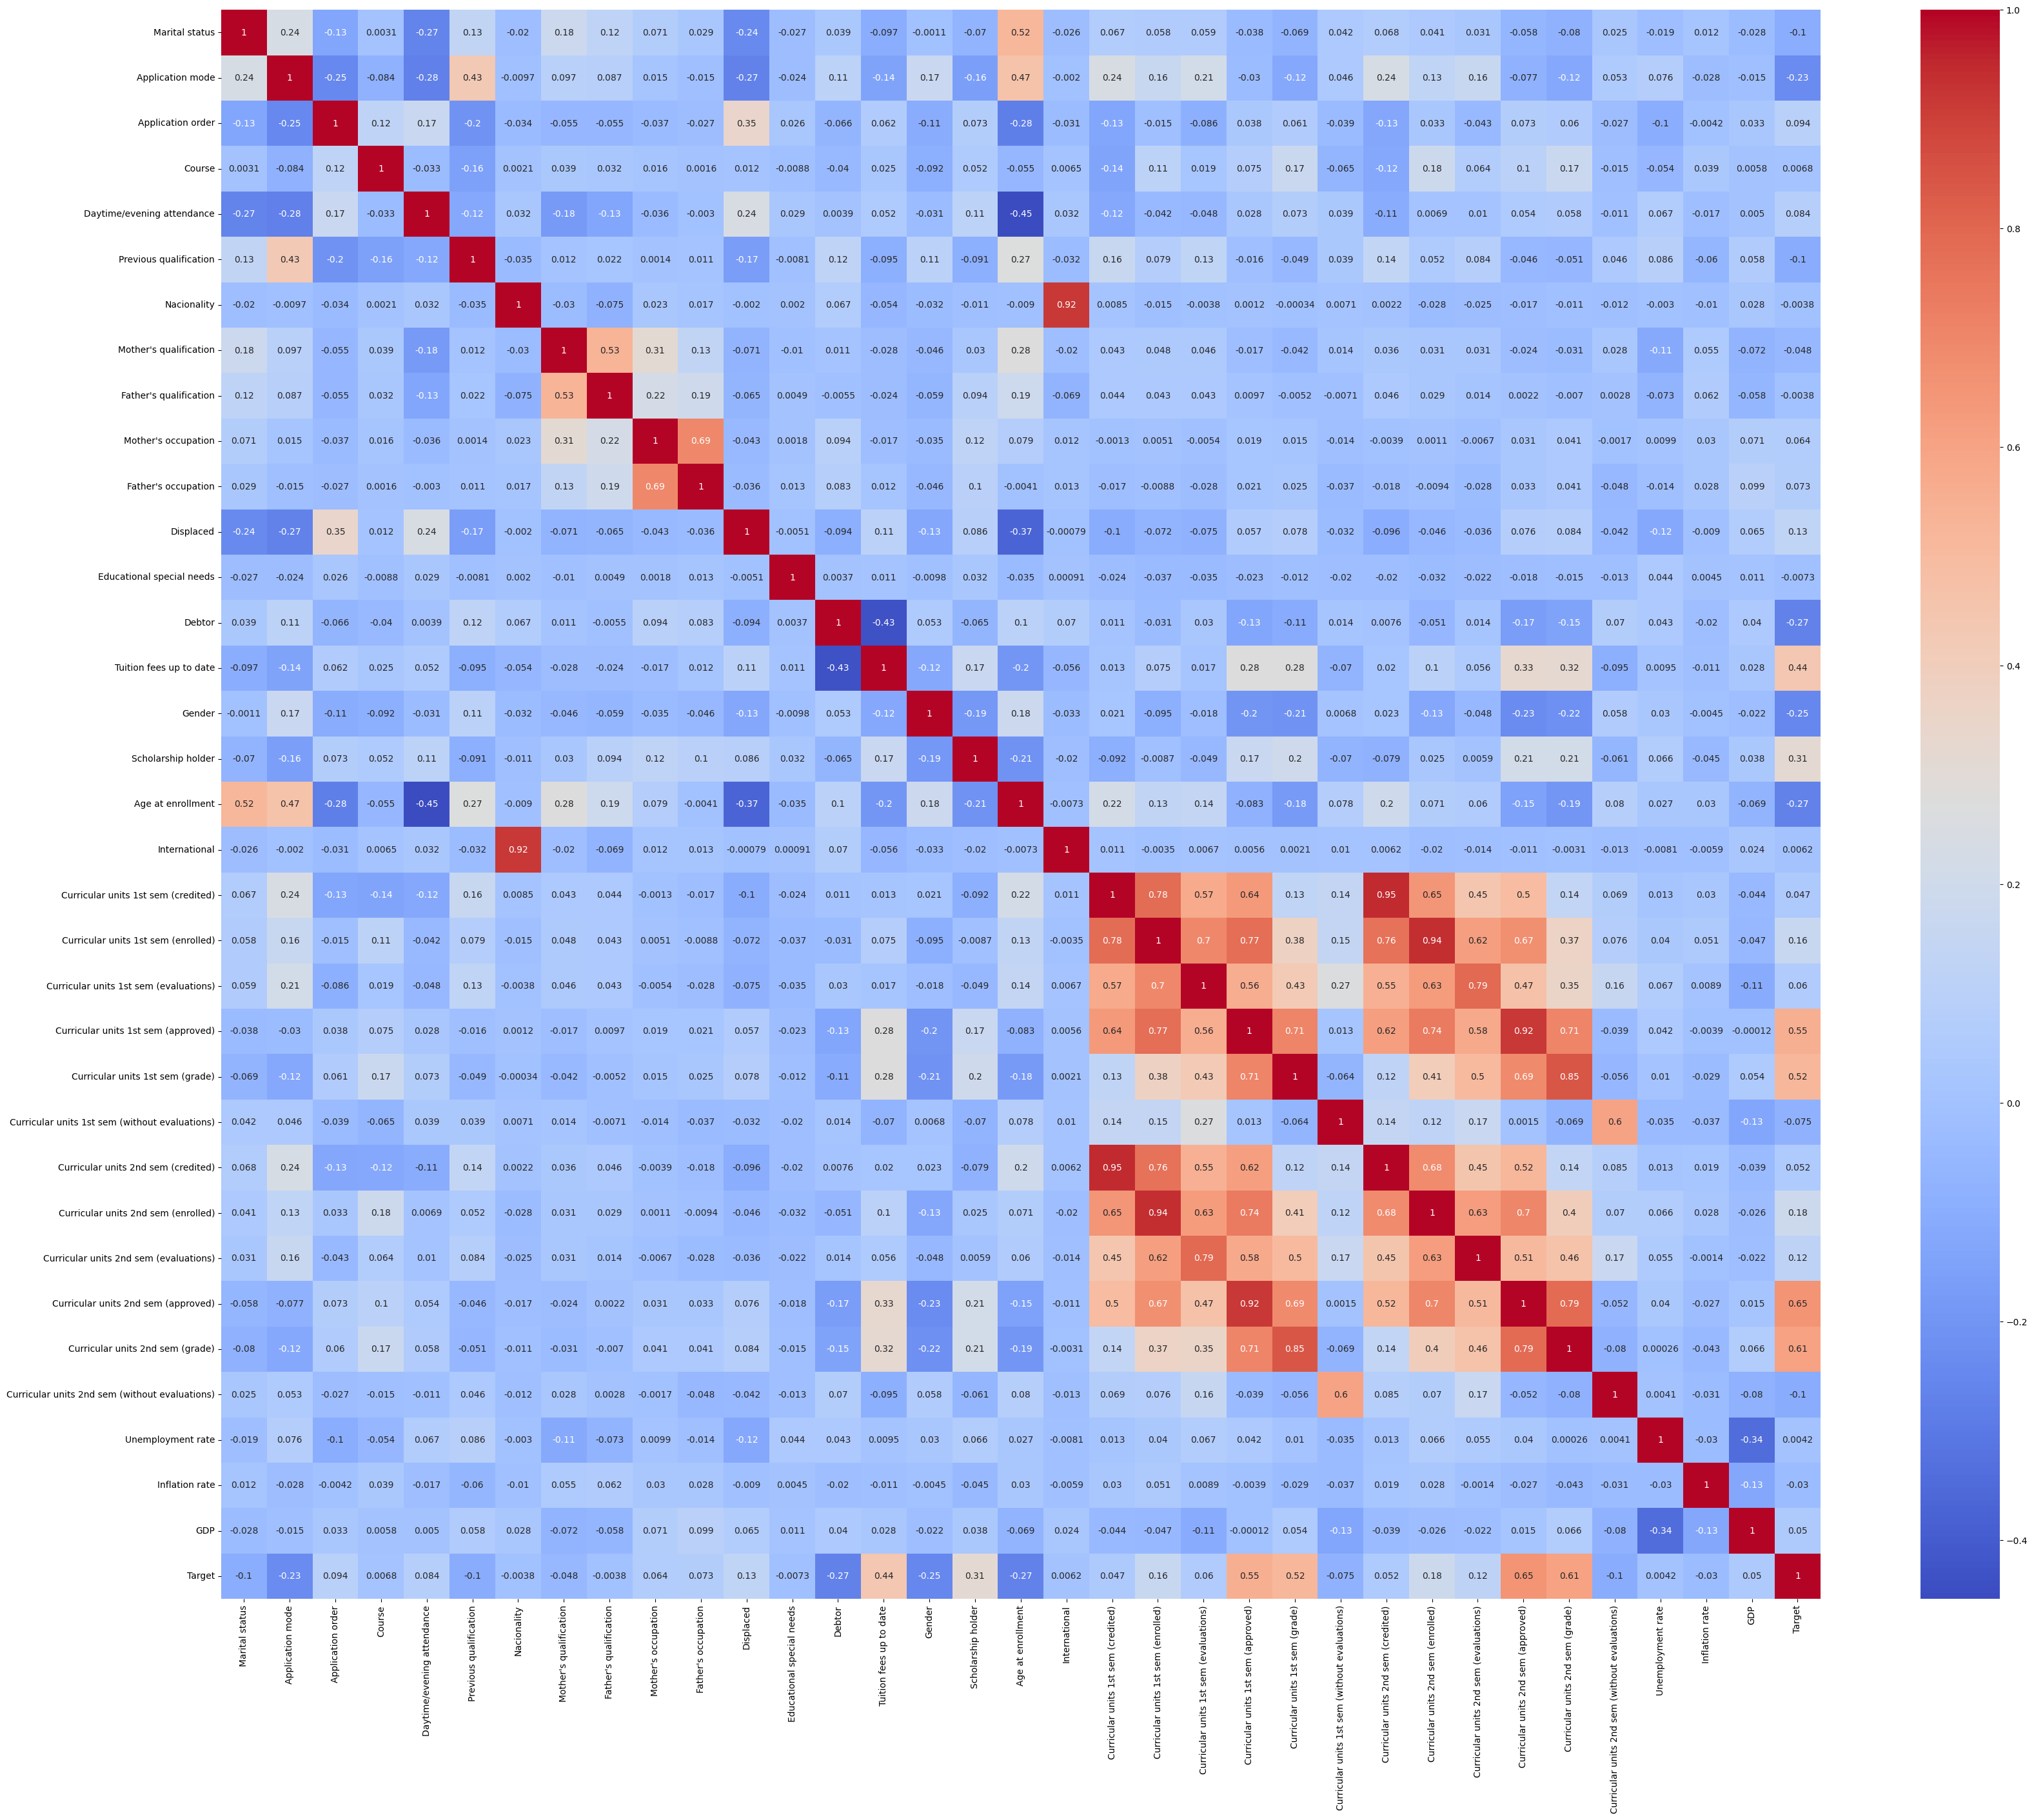

In [ ]:


# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your data file


# Correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# preparation

In [ ]:
# -------------------- 2. Mann-Whitney U Test --------------------
# Hypotheses:
# H₀: No difference in Mother's Qualification distribution between graduates and dropouts
# H₁: There is a difference in Mother's Qualification distribution

mann_whitney_mother = mannwhitneyu(data[data['Target'] == 1]["Mother's qualification"],
                                   data[data['Target'] == 0]["Mother's qualification"])

print(f"\nMann-Whitney U Test for Mother's Qualification:")
print(f"Statistic: {mann_whitney_mother.statistic:.4f}, P-value: {mann_whitney_mother.pvalue:.4e}")

# -------------------- 3. Kruskal-Wallis Test --------------------
# Hypotheses:
# H₀: Distributions of grades are the same across application modes
# H₁: Distributions of grades differ across application modes

kruskal_application = kruskal(data['Curricular units 1st sem (grade)'], data['Application mode'])

print(f"\nKruskal-Wallis Test for First-Semester Grades by Application Mode:")
print(f"Statistic: {kruskal_application.statistic:.4f}, P-value: {kruskal_application.pvalue:.4e}")

# -------------------- 4. Chi-Square Test --------------------
# Hypotheses:
# H₀: No association between scholarship status and graduation
# H₁: There is an association between scholarship status and graduation

contingency_table = pd.crosstab(data['Scholarship holder'], data['Target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test for Scholarship Status vs Graduation:")
print(f"Chi-Square Statistic: {chi2:.4f}, P-value: {p:.4e}")


# Age at enrollment

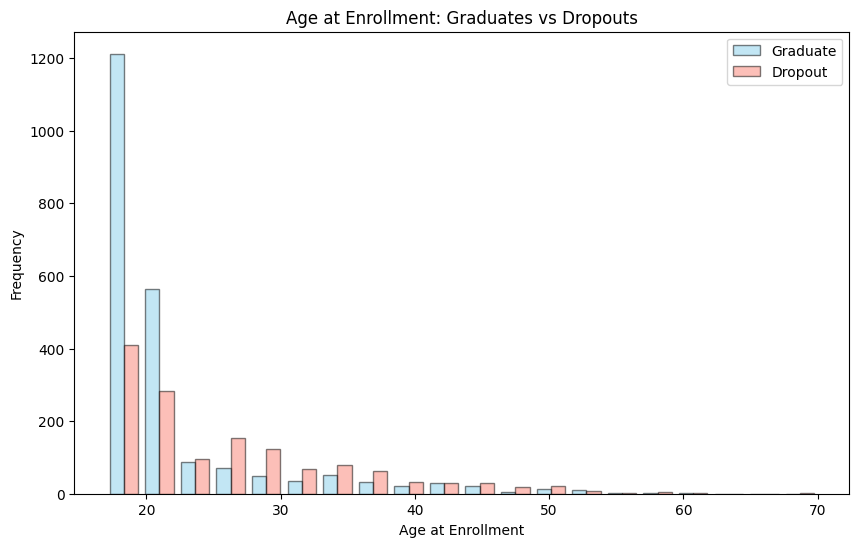

In [ ]:
# 4. Overlapping Histogram for Age at Enrollment: Graduates vs Dropouts
plt.figure(figsize=(10, 6))
plt.hist([data[data['Target'] == 1]['Age at enrollment'], data[data['Target'] == 0]['Age at enrollment']],
         bins=20, color=['skyblue', 'salmon'], label=['Graduate', 'Dropout'], alpha=0.5, edgecolor='black')
plt.title('Age at Enrollment: Graduates vs Dropouts')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.legend()
plt.show()

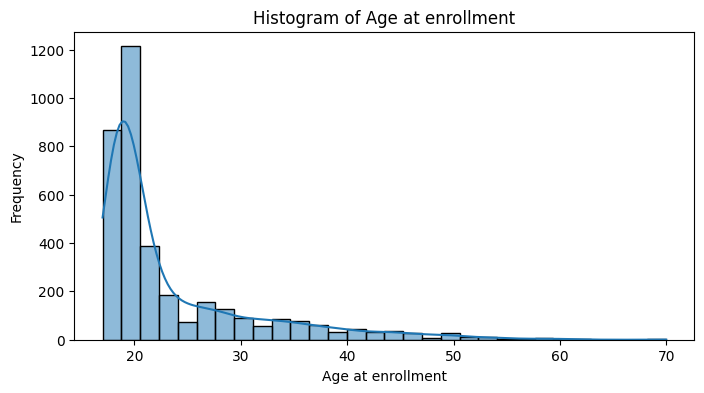

In [ ]:
# Example: Checking normality for 'Age at enrollment'
plt.figure(figsize=(8, 4))
sns.histplot(data['Age at enrollment'], bins=30, kde=True)
plt.title('Histogram of Age at enrollment')
plt.xlabel('Age at enrollment')
plt.ylabel('Frequency')
plt.show()


<Figure size 600x600 with 0 Axes>

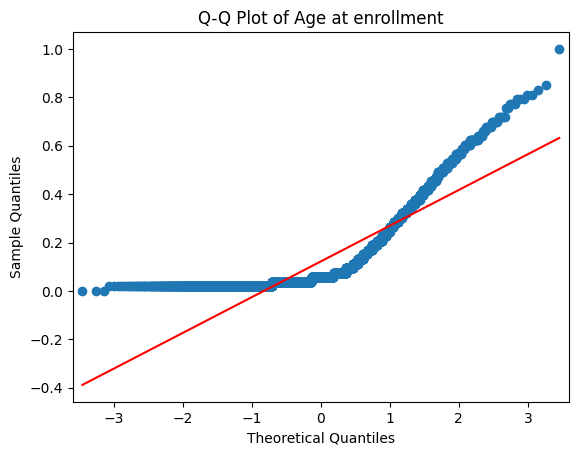

In [ ]:
# Example: Q-Q plot for 'Age at enrollment'
plt.figure(figsize=(6, 6))
sm.qqplot(data['Age at enrollment'], line='s')
plt.title('Q-Q Plot of Age at enrollment')
plt.show()


In [ ]:
# Example: Kolmogorov-Smirnov test for 'Age at enrollment'
statistic, p_value = kstest(data['Age at enrollment'], 'norm')
print(f"Kolmogorov-Smirnov test for 'Age at enrollment': Statistic = {statistic}, P-value = {p_value}")


Kolmogorov-Smirnov test for 'Age at enrollment': Statistic = 0.5067003199677773, P-value = 0.0


# Curricular units 1st sem (grade)

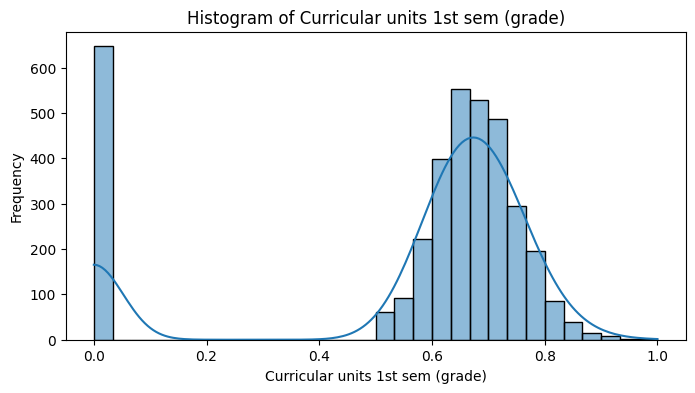

In [ ]:
gg=data[data['Curricular units 1st sem (grade)']!=0]
# Example: Checking normality for ''Curricular units 1st sem (grade)''
plt.figure(figsize=(8, 4))
sns.histplot(data['Curricular units 1st sem (grade)'], bins=30, kde=True)
plt.title('Histogram of Curricular units 1st sem (grade)')
plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Frequency')
plt.show()


<Figure size 600x600 with 0 Axes>

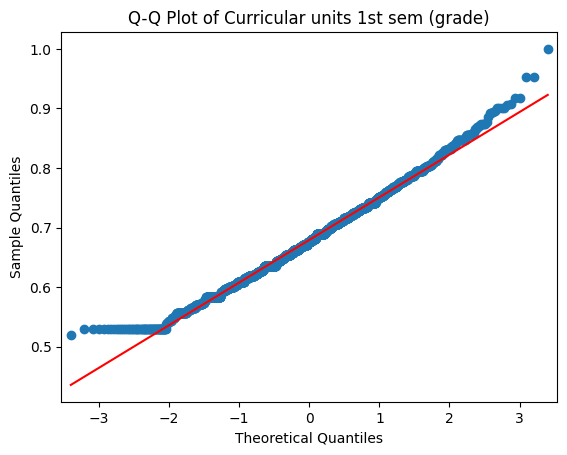

In [ ]:
# Example: Q-Q plot for 'Age at enrollment'
plt.figure(figsize=(6, 6))
sm.qqplot(gg2['Curricular units 1st sem (grade)'], line='s')
plt.title('Q-Q Plot of Curricular units 1st sem (grade)')
plt.show()


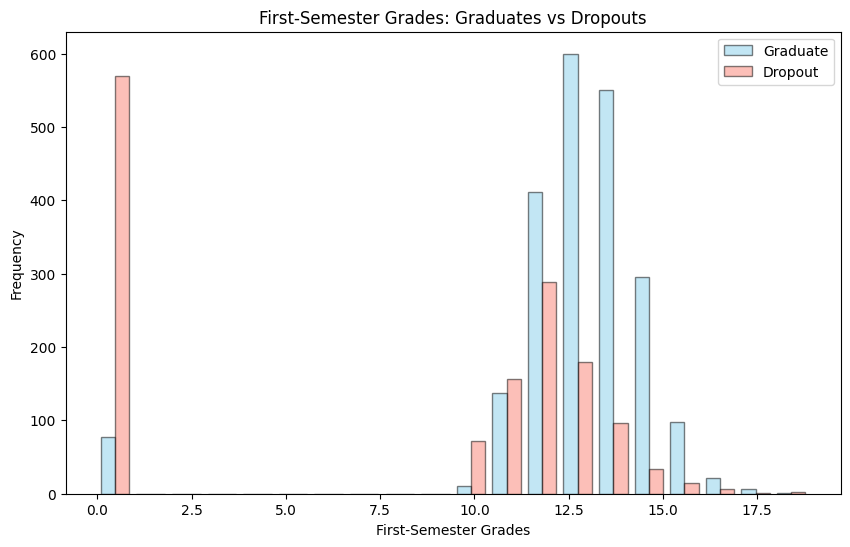

In [ ]:
# 5. Overlapping Histogram for First-Semester Grades: Graduates vs Dropouts
plt.figure(figsize=(10, 6))
plt.hist([data[data['Target'] == 1]['Curricular units 1st sem (grade)'], data[data['Target'] == 0]['Curricular units 1st sem (grade)']],
         bins=20, color=['skyblue', 'salmon'], label=['Graduate', 'Dropout'], alpha=0.5, edgecolor='black')
plt.title('First-Semester Grades: Graduates vs Dropouts')
plt.xlabel('First-Semester Grades')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Application Mode vs Grades

<ipython-input-47-5731ba04d016>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Application mode', y='Curricular units 1st sem (grade)', data=data, palette='Set2')


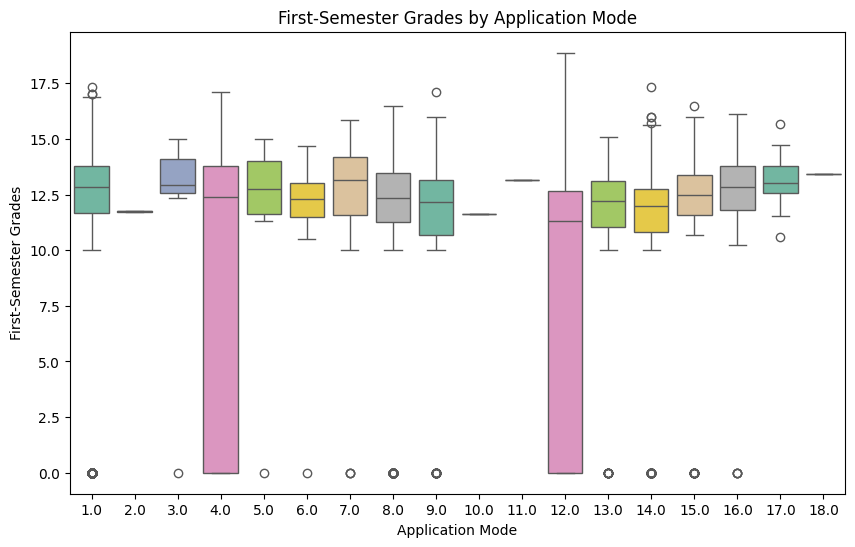

In [47]:
# 2. Boxplot for Kruskal-Wallis Test (Application Mode vs Grades)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Application mode', y='Curricular units 1st sem (grade)', data=data, palette='Set2')
plt.title('First-Semester Grades by Application Mode')
plt.xlabel('Application Mode')
plt.ylabel('First-Semester Grades')
plt.show()

# Age vs Grades

In [ ]:
# 6. Scatter plot: Age vs Grades (Color by Graduation Status)
plt.scatter(data['Age at enrollment'], data['Curricular units 1st sem (grade)'], c=data['Target'], cmap='coolwarm')
plt.title('Age vs Grades (Color by Graduation Status)')
plt.xlabel('Age')
plt.ylabel('First Semester Grade')
plt.colorbar(label='Graduation Status (1=Graduate, 0=Dropout)')
plt.show()


# Mother's qualification

<ipython-input-46-45c048d5f807>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y="Mother's qualification", data=data, palette='Set3')


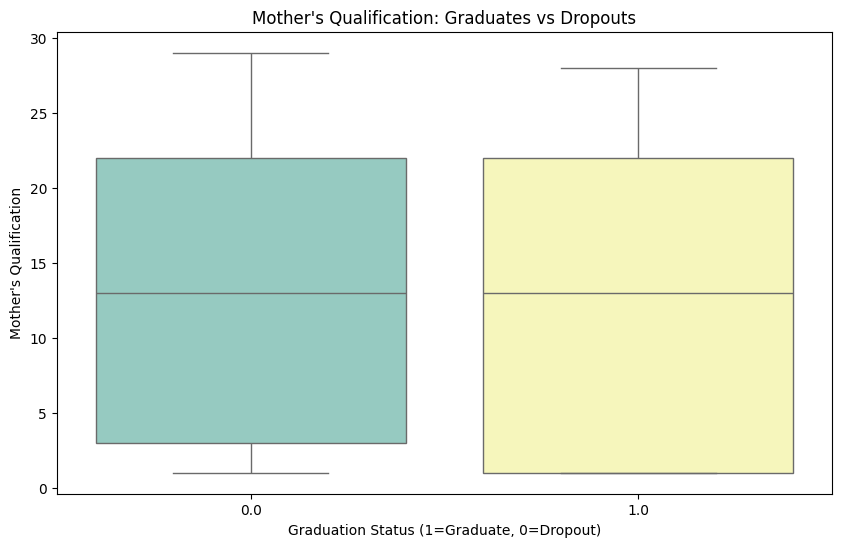

In [46]:
# -------------------- 5. Visualizations --------------------

# 1. Boxplot for Mann-Whitney U Test (Mother's Qualification)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y="Mother's qualification", data=data, palette='Set3')
plt.title("Mother's Qualification: Graduates vs Dropouts")
plt.xlabel('Graduation Status (1=Graduate, 0=Dropout)')
plt.ylabel("Mother's Qualification")
plt.show()





# Scholarship

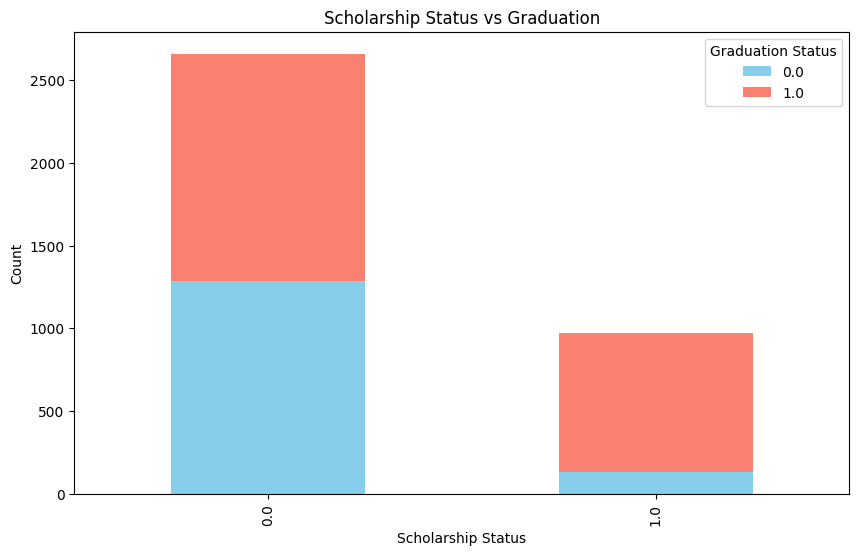

In [ ]:
# 3. Bar Plot for Chi-Square Test (Scholarship Status vs Graduation)
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Scholarship Status vs Graduation')
plt.xlabel('Scholarship Status')
plt.ylabel('Count')
plt.legend(title='Graduation Status')
plt.show()

# logistic regression


Correlation Matrix:
                                  Age at enrollment  \
Age at enrollment                          1.000000   
Curricular units 1st sem (grade)          -0.180723   
Curricular units 2nd sem (grade)          -0.194145   

                                  Curricular units 1st sem (grade)  \
Age at enrollment                                        -0.180723   
Curricular units 1st sem (grade)                          1.000000   
Curricular units 2nd sem (grade)                          0.845864   

                                  Curricular units 2nd sem (grade)  
Age at enrollment                                        -0.194145  
Curricular units 1st sem (grade)                          0.845864  
Curricular units 2nd sem (grade)                          1.000000  


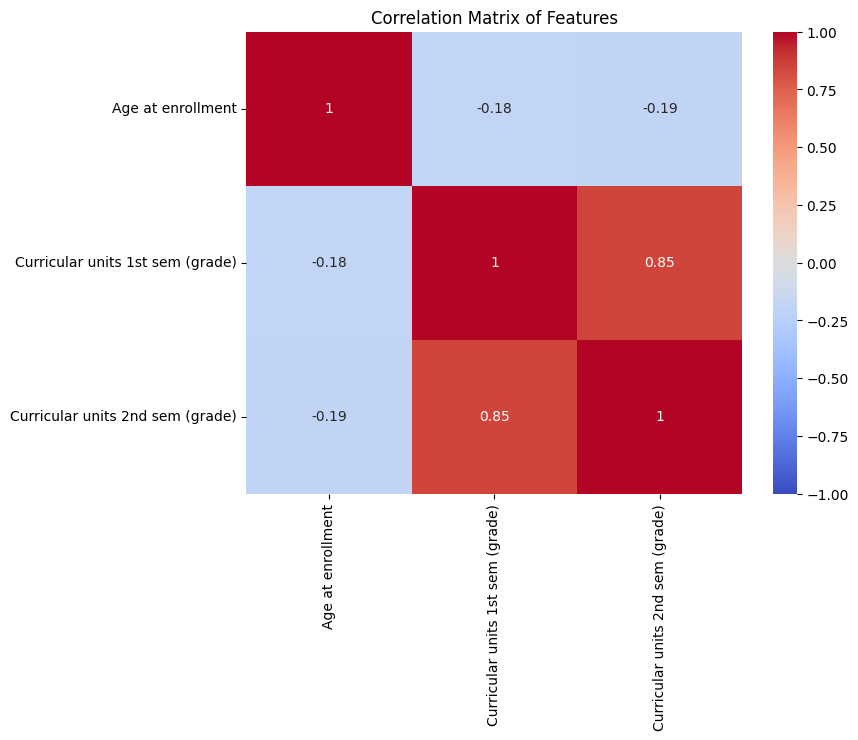

<ipython-input-30-b41b2c8d92b8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age_Grades_Interaction'] = X['Age at enrollment'] * X['Curricular units 1st sem (grade)']


Optimization terminated successfully.
         Current function value: 0.443216
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 2541
Model:                          Logit   Df Residuals:                     2536
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.3399
Time:                        19:48:37   Log-Likelihood:                -1126.2
converged:                       True   LL-Null:                       -1706.2
Covariance Type:            nonrobust   LLR p-value:                7.267e-250
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                5.3273      1.077      4.94

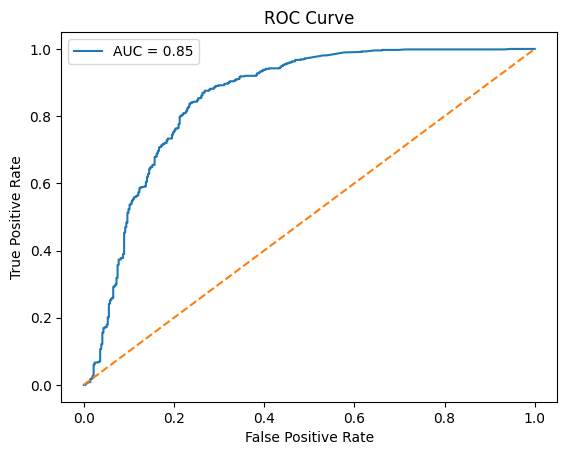

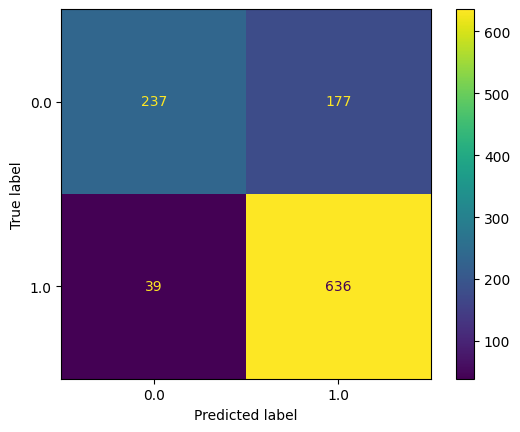

In [ ]:
# -------------------- 7. Correlation Matrix --------------------
# Correlation matrix for selected features
corr_matrix = data[['Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()

# -------------------- 8. Logistic Regression with Interaction Terms --------------------
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Prepare data for logistic regression
X = data[['Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']]
y = data['Target']

# Adding interaction term between Age and First-Semester Grades
X['Age_Grades_Interaction'] = X['Age at enrollment'] * X['Curricular units 1st sem (grade)']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression model with interaction terms
logit_model_interaction = sm.Logit(y_train, sm.add_constant(X_train))
result_interaction = logit_model_interaction.fit()
print(result_interaction.summary())

# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = result_interaction.predict(sm.add_constant(X_test))
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_probs.round())


# tests

35


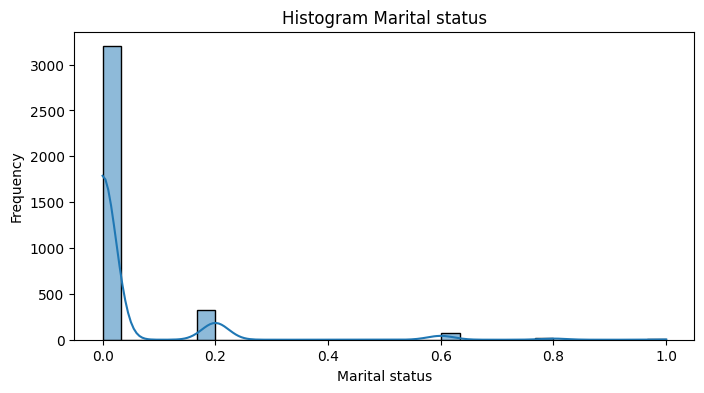

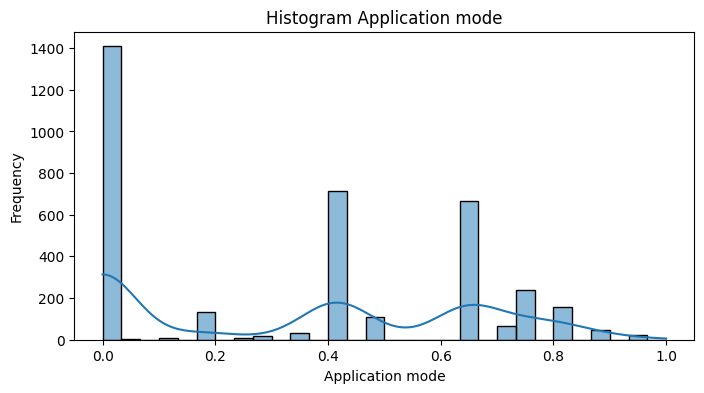

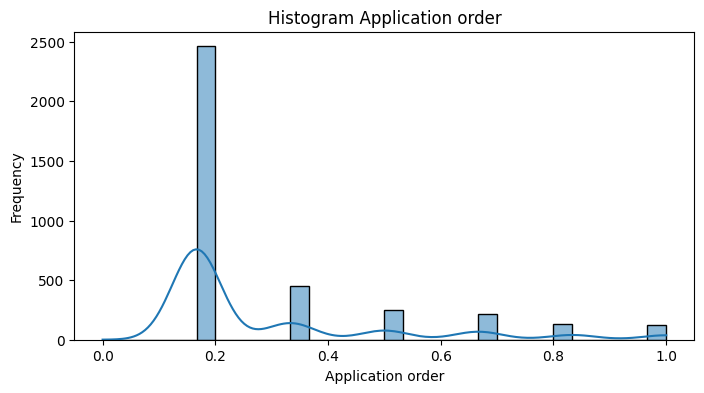

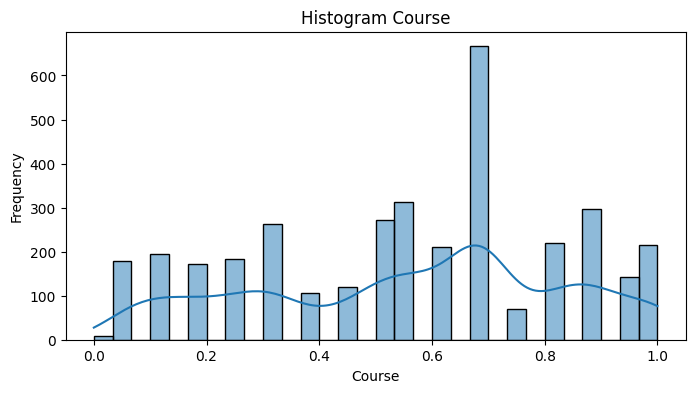

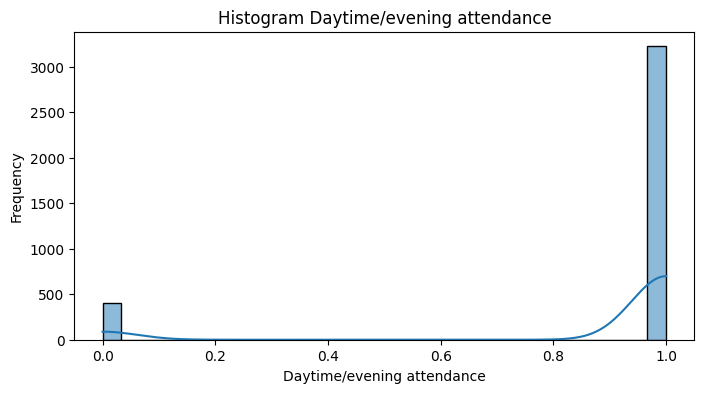

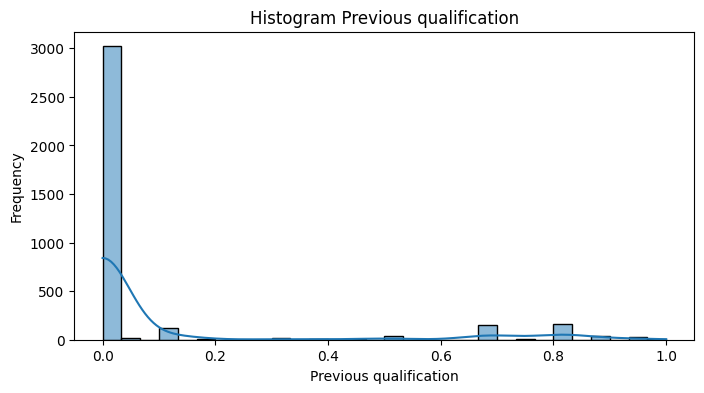

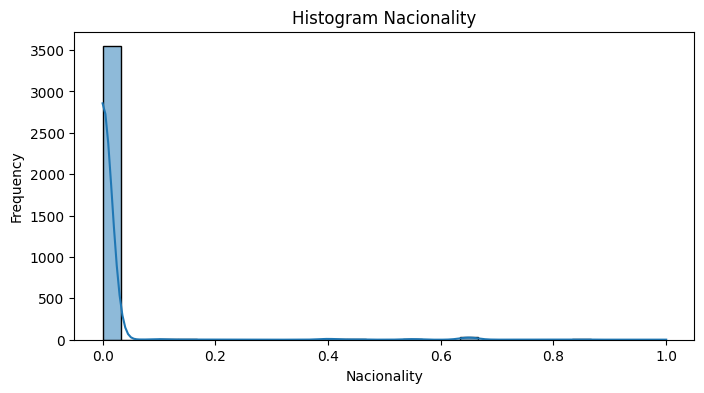

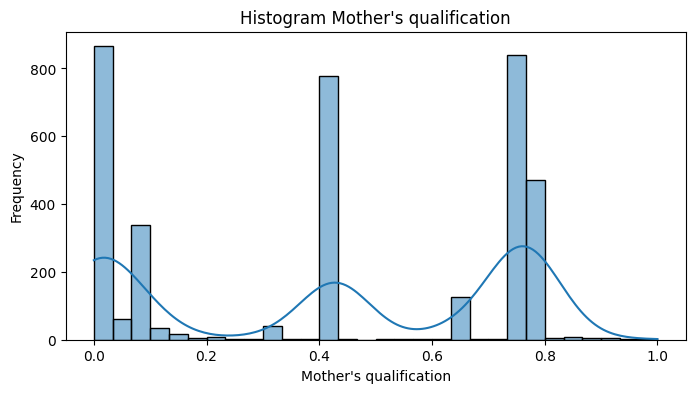

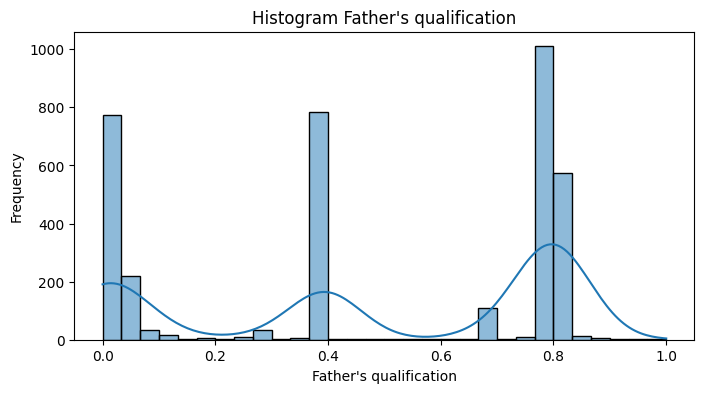

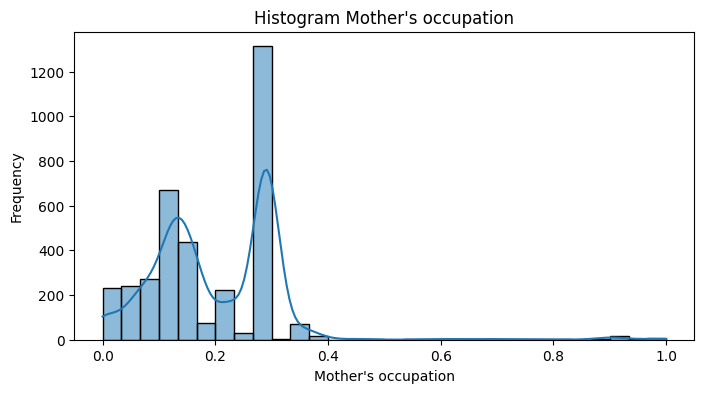

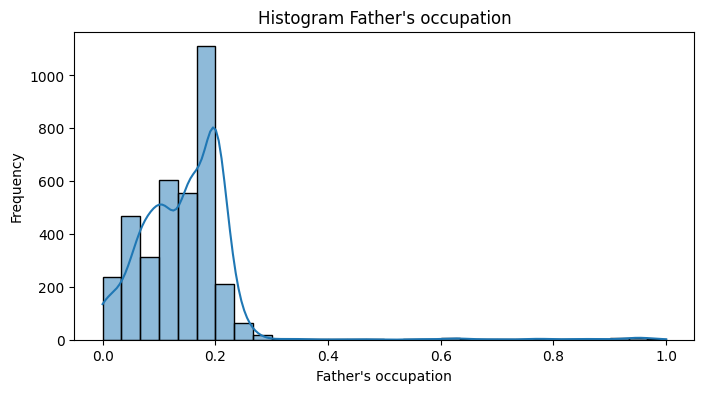

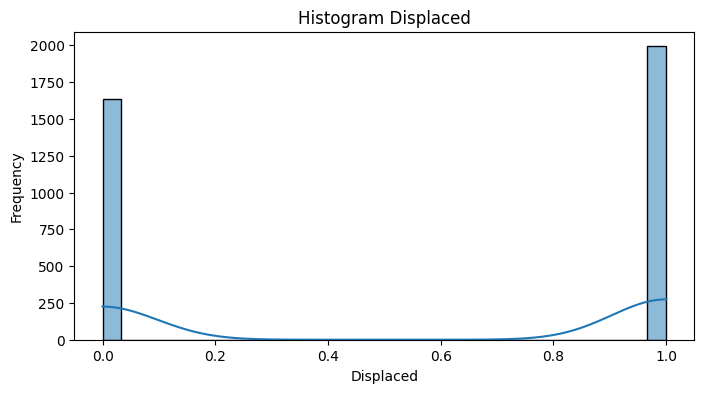

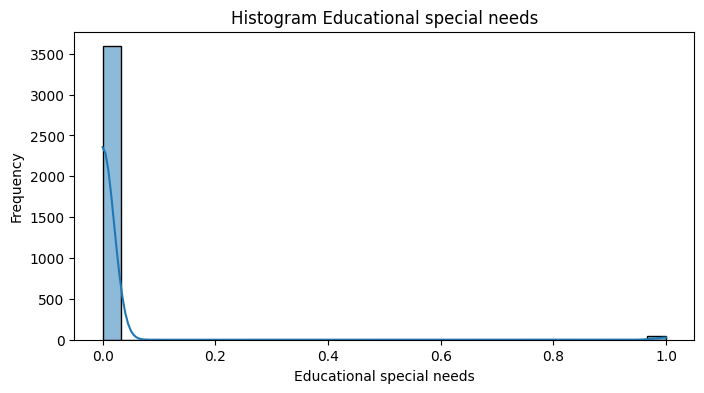

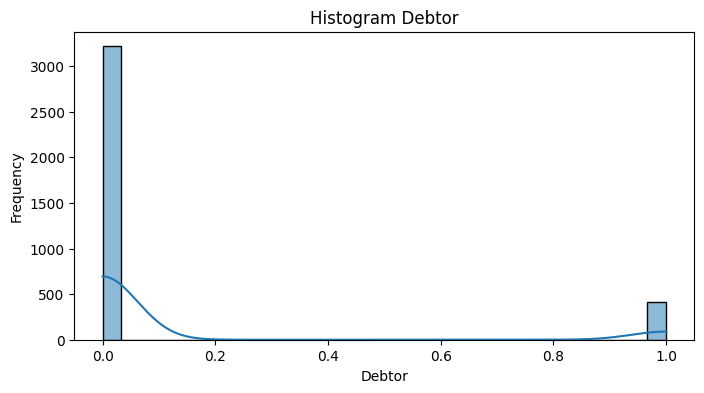

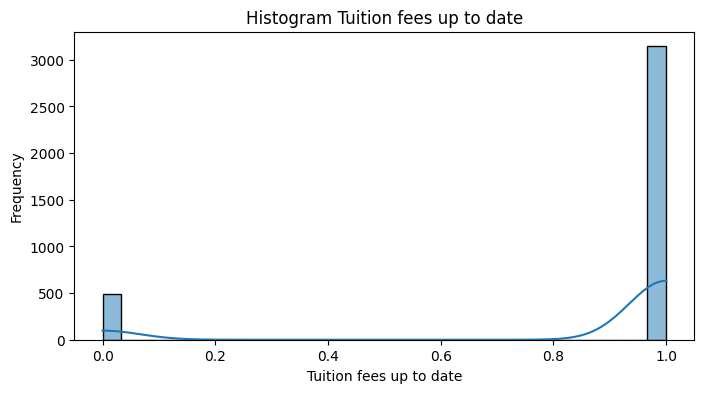

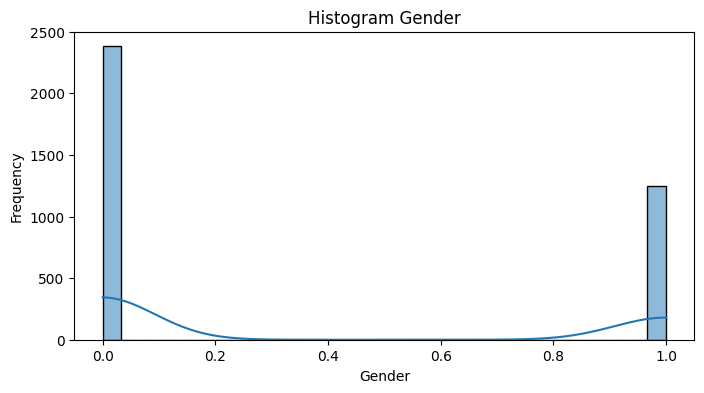

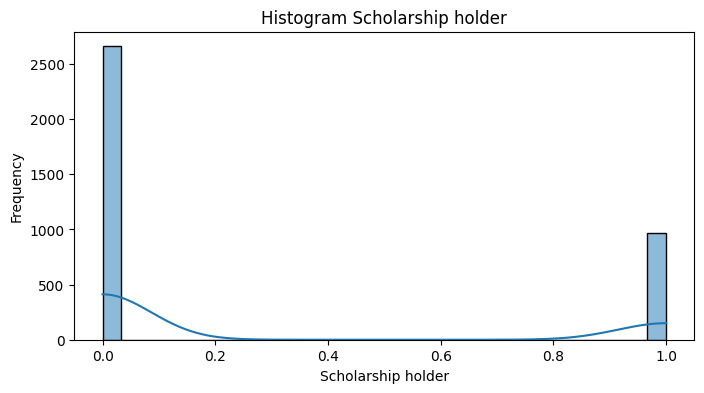

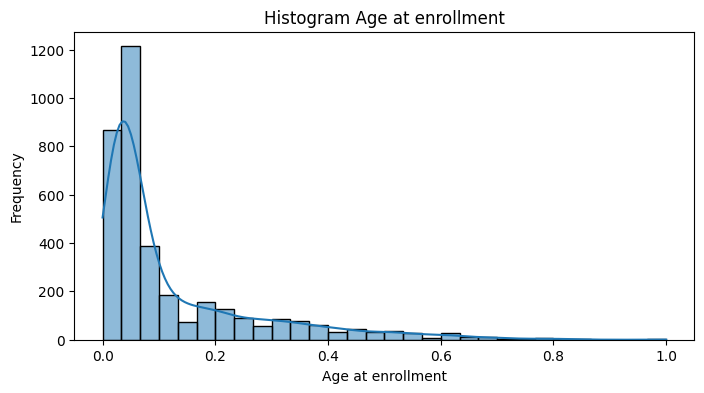

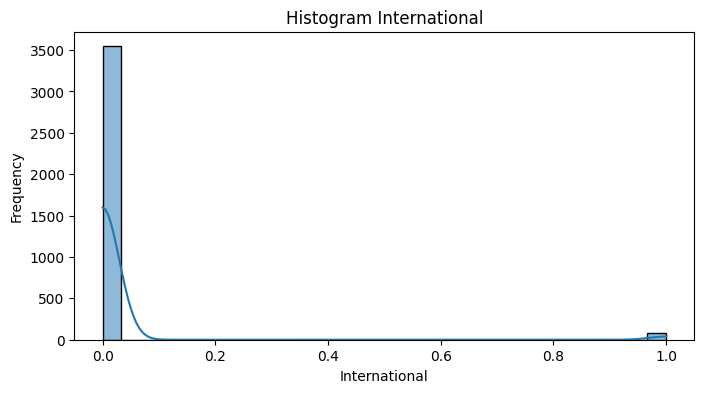

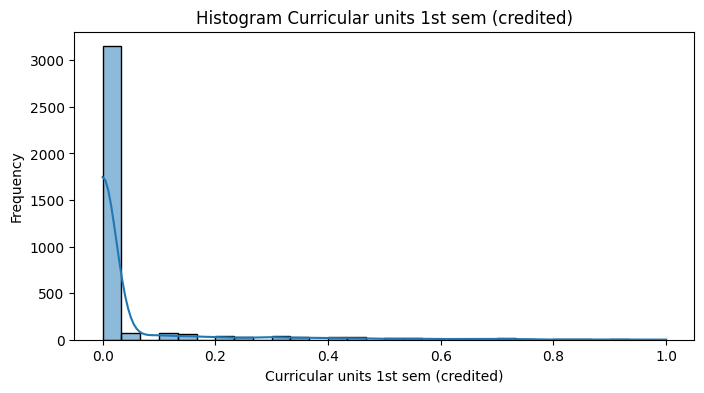

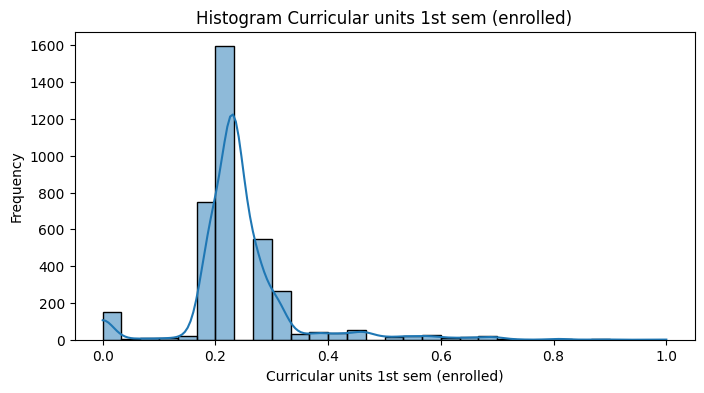

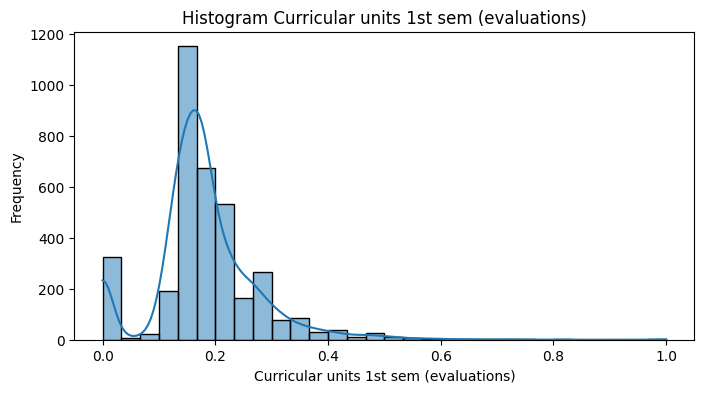

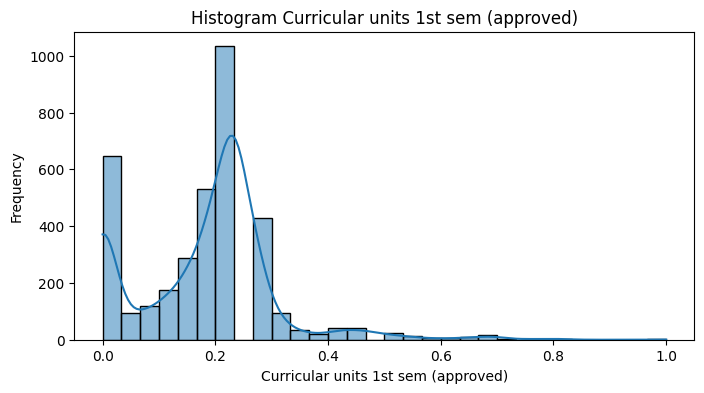

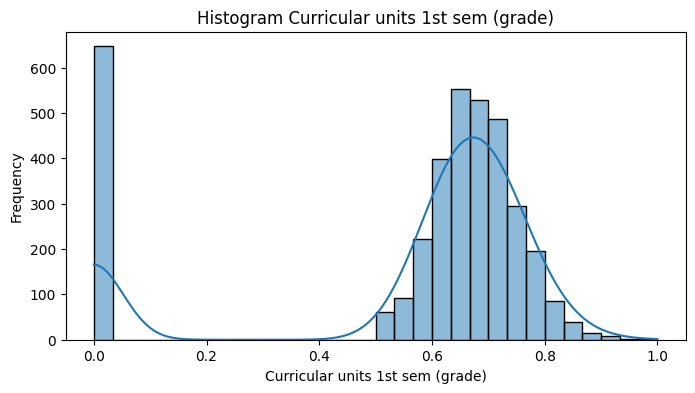

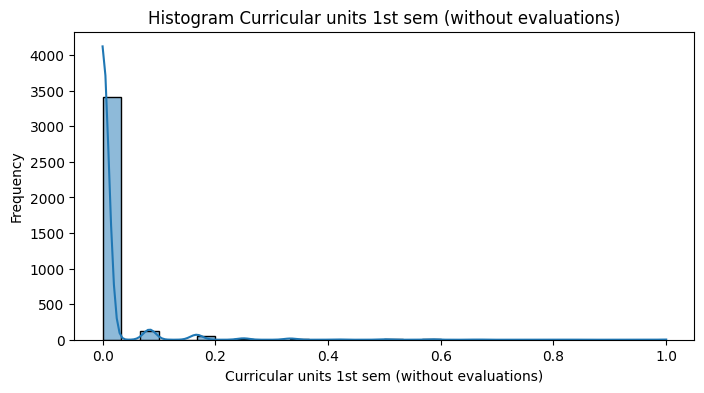

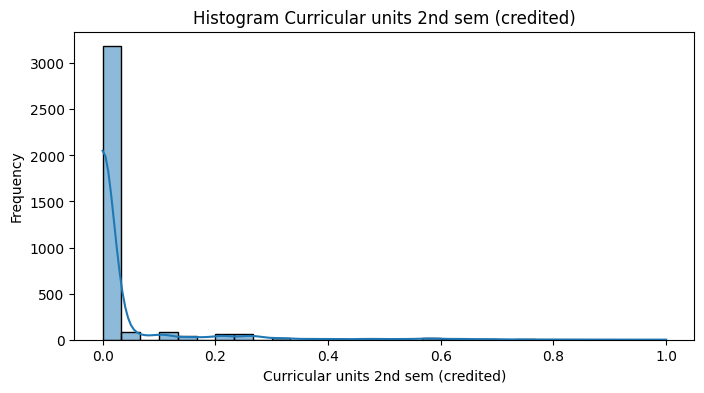

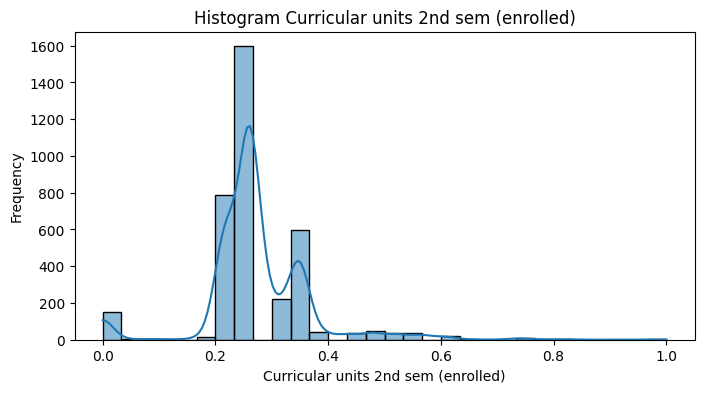

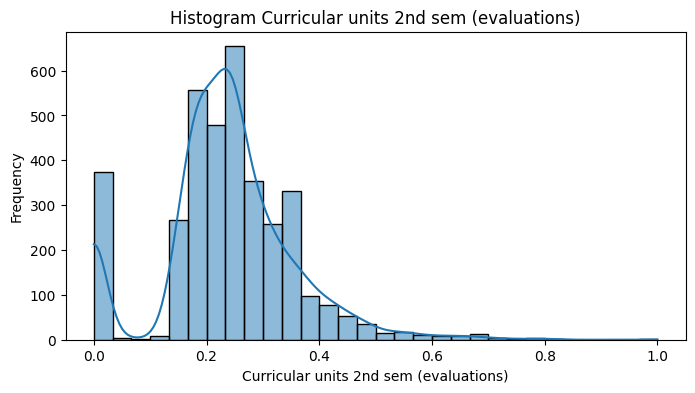

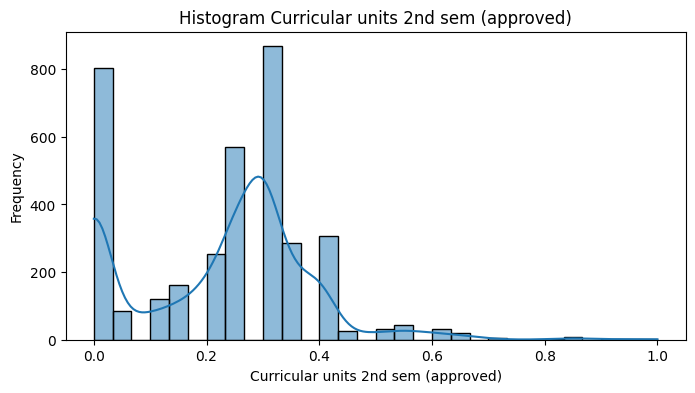

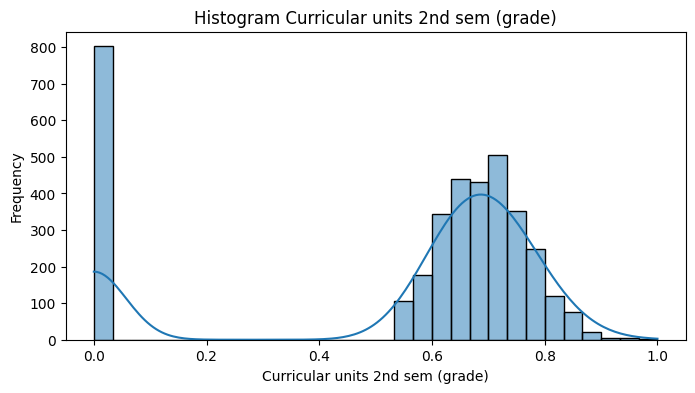

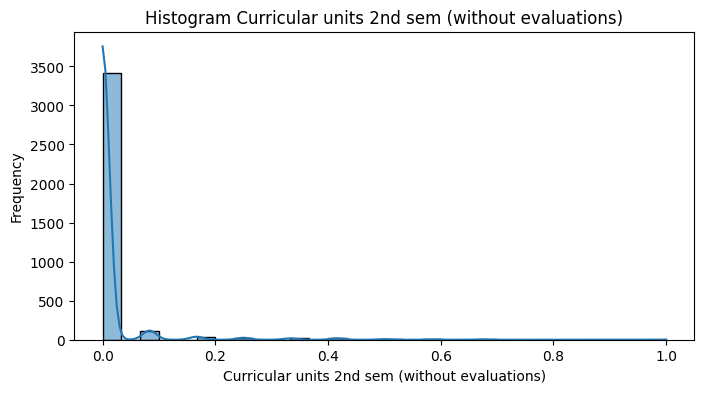

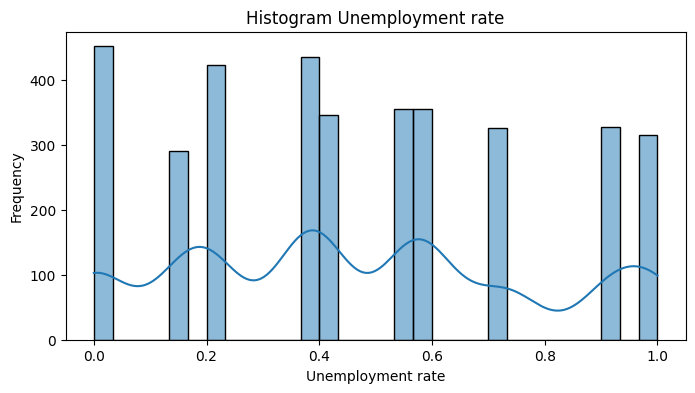

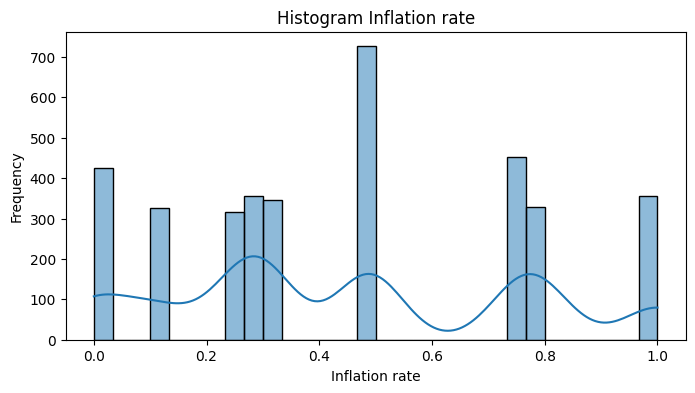

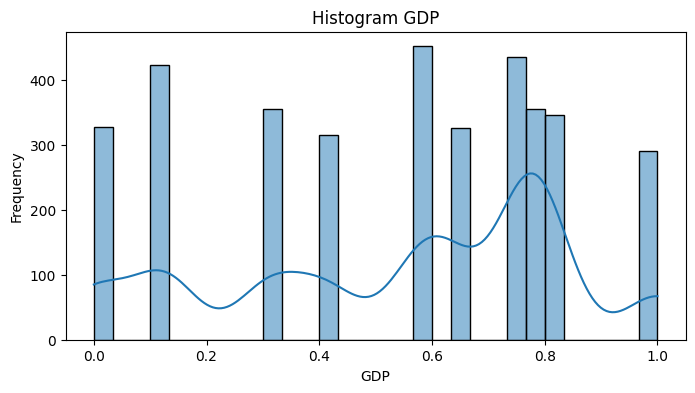

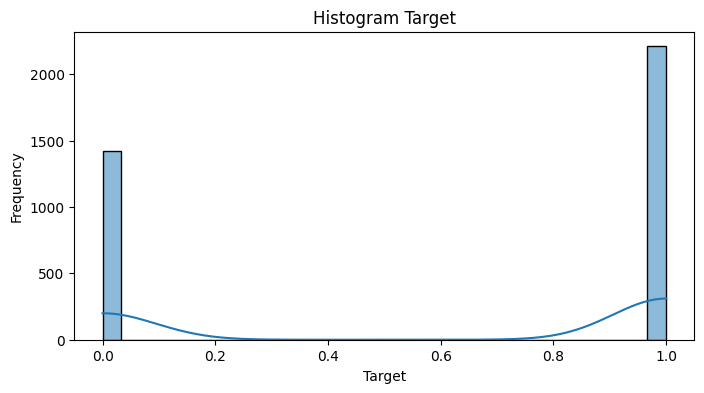

In [ ]:
print(len(data.columns))
for item in data.columns:
  # Example: Histogram for 'Gender'
  plt.figure(figsize=(8, 4))
  sns.histplot(data[item], bins=30, kde=True)
  plt.title(f'Histogram {item}')
  plt.xlabel(f'{item}')
  plt.ylabel('Frequency')
  plt.show()


In [ ]:

gg2 = data.copy()

# Function to check normality for each feature
def check_normality(df, features):
    normality_results = {}
    for feature in features:
        stat, p_value = shapiro(df[feature])
        normality_results[feature] = (stat, p_value)
        print(f"Shapiro-Wilk test for {feature}: Statistic = {stat}, P-value = {p_value}")
    return normality_results

# Function to perform the Mann-Whitney U Test
def perform_mannwhitneyu(groups):
    if len(groups) == 2:
        stat, p_value = mannwhitneyu(groups[0], groups[1])
    else:
        stat, p_value = kruskal(*groups)
    return stat, p_value

# Function to perform the appropriate statistical test based on normality
def perform_stat_tests(df, features, normality_results):
    rejected_h0_features = []
    failed_to_reject_h0_features = []

    for feature in features:
        groups = [df[df[feature] == level]['Target'] for level in df[feature].unique()]

        # Check normality
        stat, p_value = normality_results[feature]

        # If p-value > 0.05, assume normality (ANOVA), otherwise use Kruskal-Wallis or Mann-Whitney U
        if p_value > 0.05:
            test_stat, test_p_value = f_oneway(*groups)
            test_name = "ANOVA"
        elif len(df[feature].unique()) > 2:
            test_stat, test_p_value = kruskal(*groups)
            test_name = "Kruskal-Wallis"
        else:
            test_stat, test_p_value = perform_mannwhitneyu(groups)
            test_name = "Mann-Whitney U"

        # Print the test results
        print(f"{test_name} for {feature}: Statistic = {test_stat}, P-value = {test_p_value}")
        if test_p_value <= 0.05:
            print(f"Reject H0: {feature} has a significant effect on 'Target'.")
            rejected_h0_features.append(feature)
        else:
            print(f"Fail to reject H0: {feature} does not have a significant effect on 'Target'.")
            failed_to_reject_h0_features.append(feature)

    return rejected_h0_features, failed_to_reject_h0_features

# Main analysis function
def analyze_features(df, target_column='Target'):
    # Drop the target column from the list of features
    features = df.columns.drop(target_column)

    # Step 1: Check normality of each feature
    normality_results = check_normality(df, features)

    # Step 2: Perform statistical tests based on normality
    rejected_h0_features, failed_to_reject_h0_features = perform_stat_tests(df, features, normality_results)

    # Step 3: Output results
    print("\nFeatures where H0 is rejected (significant effect on Target):")
    print(rejected_h0_features)

    print("\nFeatures where H0 is not rejected (no significant effect on Target):")
    print(failed_to_reject_h0_features)

# Assuming gg2 is your DataFrame
# Example usage:
analyze_features(gg2)


Shapiro-Wilk test for Marital status: Statistic = 0.3327093969795716, P-value = 1.3134654053022057e-78
Shapiro-Wilk test for Application mode: Statistic = 0.8407094193681959, P-value = 2.998078126734226e-51
Shapiro-Wilk test for Application order: Statistic = 0.6251401605870069, P-value = 7.117938908991831e-67
Shapiro-Wilk test for Course: Statistic = 0.9518663283379484, P-value = 5.548753557470088e-33
Shapiro-Wilk test for Daytime/evening attendance: Statistic = 0.3654764035660456, P-value = 1.5193021558845513e-77
Shapiro-Wilk test for Previous qualification: Statistic = 0.4343160035048965, P-value = 3.792277956165356e-75
Shapiro-Wilk test for Nacionality: Statistic = 0.12516578924252908, P-value = 1.8746984026335535e-84
Shapiro-Wilk test for Mother's qualification: Statistic = 0.8157509622961218, P-value = 9.338192510035497e-54
Shapiro-Wilk test for Father's qualification: Statistic = 0.7955440965208225, P-value = 1.3814757527590864e-55
Shapiro-Wilk test for Mother's occupation: Stat